Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.


More details about the competition here:
https://www.kaggle.com/c/nlp-getting-started

In [3]:
from IPython.core.debugger import set_trace



import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")


In [2]:
!cd data && ls

sample_submission.csv test.csv              train.csv


<IPython.core.display.Javascript object>

In [5]:
txt_data = pd.read_csv('..\Data\Sentiment Analysis Dataset.csv' , sep='|', names=['col1'])

#split data into columns with ','
txt_data = txt_data.col1.str.split(',',  3, expand=True)
txt_data.columns = list(txt_data.iloc[0])
txt_data = txt_data.drop(0)
txt_data.index = np.subtract(txt_data.index, 1)
x = txt_data.groupby('Sentiment')
l=[x.get_group(i)['SentimentText'] for i in x.groups]

neg = l[0]
pos = l[1]

In [81]:
dataset = pd.concat([txt_data['SentimentText'], txt_data['Sentiment']], axis = 1).sample(frac=1).reset_index(drop=True)
dataset.columns = ['text', 'target']

train = dataset[:100000]
test = dataset[100000:120000]

In [82]:
train.head().T

,0,1,2,3,4
text,@marquisdejolie The ones I've got I got for fr...,"""@bcclist That's probably the best question fr...",@lucero75 y is it broken my friend,"""@Etown_Jenn Yeah, that's the problem with the...","""@amyyhawkins haha ty my love, i'll kick in wh..."
target,1,1,0,0,1


In [83]:
test.head().T

,100000,100001,100002,100003,100004
text,...I'll leave twitterville with this I AM NOT ...,Why would ever say fml? Jesus help us all,Sunny Here! Everyone have a fun and safe week...,"""At my cousins last soccer game,.. Pretty exci...",Mad tireddd yo! i missed 11:11 and larry king ...
target,1,0,1,1,0


Remove URLs and HTML

In [84]:
import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

In [85]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

Remove punctuation

In [86]:
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [87]:
train["text"] = train.text.map(lambda x: remove_URL(x))
train["text"] = train.text.map(lambda x: remove_html(x))
train["text"] = train.text.map(lambda x: remove_emoji(x))
train["text"] = train.text.map(lambda x: remove_punct(x))

<ipython-input-87-fff3295edef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train.text.map(lambda x: remove_URL(x))
<ipython-input-87-fff3295edef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train.text.map(lambda x: remove_html(x))
<ipython-input-87-fff3295edef4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Remove stopwords

In [88]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [89]:
train["text"] = train["text"].map(remove_stopwords)

<ipython-input-89-9c539947c393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train["text"].map(remove_stopwords)


In [90]:
train.text

0                     marquisdejolie ones ive got got free
1        bcclist thats probably best question last nigh...
2                                   lucero75 broken friend
3               etownjenn yeah thats problem chatsyou cant
4                        amyyhawkins haha ty love ill kick
                               ...                        
99995    cracker barrel heading beach land already gett...
99996           thinks dad awesome taking us super fun day
99997    posters able findughh still looks empty withou...
99998    2 hours fu traffic jam finally reached destina...
99999                blackberry goes london amp paris come
Name: text, Length: 100000, dtype: object

### Basic NLP

In [91]:
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [92]:
text = train.text

counter = counter_word(text)

In [93]:
len(counter)

107312

In [94]:
counter

Counter({'marquisdejolie': 1,
         'ones': 243,
         'ive': 1449,
         'got': 3754,
         'free': 448,
         'bcclist': 1,
         'thats': 1936,
         'probably': 431,
         'best': 1019,
         'question': 124,
         'last': 2305,
         'night': 2628,
         '6': 300,
         'time': 3567,
         'outs': 11,
         'use': 517,
         'im': 11281,
         'complaining': 24,
         'lucero75': 1,
         'broken': 175,
         'friend': 656,
         'etownjenn': 1,
         'yeah': 1370,
         'problem': 251,
         'chatsyou': 1,
         'cant': 3967,
         'amyyhawkins': 1,
         'haha': 1946,
         'ty': 54,
         'love': 3990,
         'ill': 1950,
         'kick': 98,
         'dang': 111,
         'irv25': 2,
         'wanting': 75,
         'watch': 930,
         'house': 821,
         'party': 608,
         'numberchic': 1,
         'thanks': 2566,
         'nc': 23,
         'lovely': 412,
         'reply': 249,

In [95]:
num_words = len(counter)

# Max number of words in a sequence
max_length = 50

Train / test split

In [96]:
train_size = int(train.shape[0] * 0.8)

train_sentences = train.text[:train_size]
train_labels = train.target[:train_size]

test_sentences = train.text[train_size:]
test_labels = train.target[train_size:]

In [97]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

In [98]:
word_index = tokenizer.word_index

In [99]:
word_index

{'im': 1,
 'good': 2,
 'get': 3,
 'day': 4,
 'like': 5,
 'go': 6,
 'dont': 7,
 'going': 8,
 'work': 9,
 'today': 10,
 'cant': 11,
 'love': 12,
 'got': 13,
 'time': 14,
 'lol': 15,
 'back': 16,
 'u': 17,
 'know': 18,
 'one': 19,
 'really': 20,
 'well': 21,
 'see': 22,
 'still': 23,
 'night': 24,
 'new': 25,
 'want': 26,
 'think': 27,
 'thanks': 28,
 'amp': 29,
 'home': 30,
 'oh': 31,
 '2': 32,
 'last': 33,
 'much': 34,
 'need': 35,
 'miss': 36,
 'tomorrow': 37,
 'great': 38,
 'hope': 39,
 'morning': 40,
 'haha': 41,
 'ill': 42,
 'thats': 43,
 'twitter': 44,
 'feel': 45,
 'fun': 46,
 'sad': 47,
 'would': 48,
 'wish': 49,
 'didnt': 50,
 'right': 51,
 'sleep': 52,
 'bad': 53,
 'sorry': 54,
 'happy': 55,
 'tonight': 56,
 'getting': 57,
 'way': 58,
 'come': 59,
 'nice': 60,
 'though': 61,
 'make': 62,
 'gonna': 63,
 'ive': 64,
 'wait': 65,
 'bed': 66,
 'watching': 67,
 'youre': 68,
 'yeah': 69,
 'better': 70,
 'could': 71,
 'week': 72,
 'hate': 73,
 'people': 74,
 'school': 75,
 'even': 76,


In [100]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [101]:
train_sequences[0]

[23737, 463, 64, 13, 13, 268]

In [102]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [103]:
train_padded[0]

array([23737,   463,    64,    13,    13,   268,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

In [104]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [105]:
print(train.text[0])
print(train_sequences[0])

marquisdejolie ones ive got got free
[23737, 463, 64, 13, 13, 268]


Check inverse

In [106]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [107]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [108]:
decode(train_sequences[0])

'marquisdejolie ones ive got got free'

In [109]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (80000, 50)
Shape of test (20000, 50)


In [110]:
max_length

50

In [111]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
#from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation="sigmoid"))



model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 32)            3433984   
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,458,881
Trainable params: 3,458,881
Non-trainable params: 0
_________________________________________________________________


In [113]:
test_labels = pd.to_numeric(test_labels)
train_labels = pd.to_numeric(train_labels)

In [115]:
history = model.fit(
    train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels),
)

Epoch 1/10
2500/2500 [==============================] - 68s 27ms/step - loss: 0.6218 - accuracy: 0.6427 - val_loss: 0.6058 - val_accuracy: 0.7009
Epoch 2/10
2500/2500 [==============================] - 66s 26ms/step - loss: 0.5912 - accuracy: 0.6944 - val_loss: 0.6125 - val_accuracy: 0.7020
Epoch 3/10
2500/2500 [==============================] - 69s 28ms/step - loss: 0.5413 - accuracy: 0.7629 - val_loss: 0.6289 - val_accuracy: 0.6848
Epoch 4/10
2500/2500 [==============================] - 66s 26ms/step - loss: 0.5497 - accuracy: 0.7476 - val_loss: 0.6325 - val_accuracy: 0.6845
Epoch 5/10
2500/2500 [==============================] - 66s 26ms/step - loss: 0.5355 - accuracy: 0.7671 - val_loss: 0.6445 - val_accuracy: 0.6718
Epoch 6/10
2500/2500 [==============================] - 67s 27ms/step - loss: 0.5297 - accuracy: 0.7631 - val_loss: 0.6559 - val_accuracy: 0.6643
Epoch 7/10
2500/2500 [==============================] - 68s 27ms/step - loss: 0.5284 - accuracy: 0.7534 - val_loss: 0.6550 -

In [222]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(test_padded).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)

In [223]:
y_pred_keras

array([0.7783336 , 0.22076836, 0.22076932, ..., 0.22076729, 0.22076876,
       0.22077031], dtype=float32)

In [117]:
#inverse the labels to get the negative rates
inversed_y_pred_keras = pd.DataFrame(y_pred_keras).apply(lambda x: abs(x-1))
#false positivee is true negative here and true positive is false negative
tnr_keras, fnr_keras, thresholds_keras2 = roc_curve(test_labels, inversed_y_pred_keras)

In [118]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras2 = auc(fnr_keras, tnr_keras)

In [119]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_padded, train_labels)

y_pred_rf = rf.predict_proba(test_padded)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_labels, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

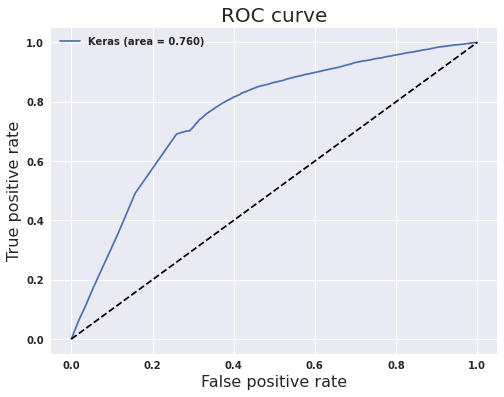

In [213]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#ax.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
ax.set_title('ROC curve', fontsize=20)
ax.set_xlabel('False positive rate', fontsize=16)
ax.set_ylabel('True positive rate', fontsize=16)
leg = ax.legend(loc='best')
plt.savefig('base_ROC.png', facecolor='w')
plt.show()

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [225]:
from sklearn.metrics import roc_curve, classification_report

print(classification_report(test_labels.values, np.round(y_pred_keras)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      9962
           1       0.71      0.70      0.71     10038

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000



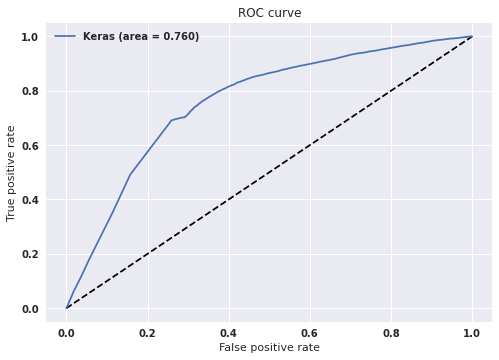

In [210]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.rc('font', size=1000)
plt.savefig('base_ROC.png', facecolor='w')
plt.show()


<ipython-input-148-080722737edc>:6: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  a.set_xticklabels(a.get_xticks(), font2)
<ipython-input-148-080722737edc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticks(), font2)
<ipython-input-148-080722737edc>:7: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  a.set_yticklabels(a.get_yticks(), font2)
<ipython-input-148-080722737edc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticks(), font2)


[Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6000000000000001, '0.6000000000000001'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0, '1.0')]

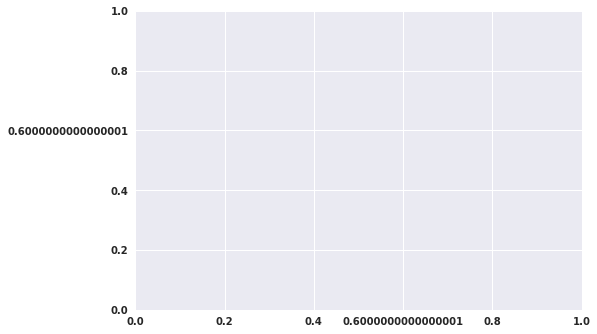

In [148]:
from matplotlib.pyplot import gca
font2 = {'family' : 'normal',
  'weight' : 'bold',
  'size' : 10}
a = gca()
a.set_xticklabels(a.get_xticks(), font2)
a.set_yticklabels(a.get_yticks(), font2)

# Confusion matrix

In [183]:
df = pd.DataFrame(y_pred_keras, columns = ["predicted"])
#make predictions either 0 or 1
df["predicted"] = df["predicted"].apply(lambda x: round(x))
test_labels.index = df.index
df = pd.concat([df,test_labels], axis =1)
df

,predicted,target
0,1,1
1,0,0
2,0,1
3,1,0
4,1,1
...,...,...
19995,1,1
19996,1,1
19997,0,0
19998,0,0


In [206]:
import matplotlib
font = {'family' : 'normal',
  'weight' : 'bold',
  'size' : 18}
matplotlib.rc('font', **font)

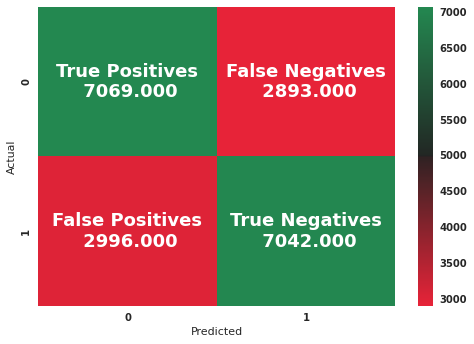

In [209]:
import seaborn as sn
confusion_matrix = pd.crosstab(df['target'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
strings = strings = np.asarray([['True Positives\n', 'False Negatives\n'],
                                ['False Positives\n', 'True Negatives\n']])
labels = (np.asarray(["{0} {1:.3f}".format(string, value)
                      for string, value in zip(strings.flatten(),
                                               confusion_matrix.values.flatten())])
         ).reshape(2, 2)
cmap = sn.diverging_palette(10, 140, s=90, l=50, n=100,sep=1,center = 'dark', as_cmap=True)
fig, ax = plt.subplots()
sn.heatmap(confusion_matrix, annot=labels, fmt="", cmap=cmap, ax=ax)
plt.savefig('base_confusion.png', facecolor='w')
plt.show()


In [123]:
plt.clf()
plt.imshow(strings, interpolation='nearest', cmap=plt.strings.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(strings[i][j]))
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'strings'

<Figure size 576x396 with 0 Axes>